In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pickle as pkl
import numpy as np
import random
import seaborn as sns


In [54]:
# Load the data
def load_data(filename):
    with open(filename, 'rb') as f:
        data = pkl.load(f)
    data_no_advertisers = [
        {
            k: v for k, v in d.items() if k != 'advertisers'
        } for d in data
    ]
    all_advertisers = [d['advertisers'] for d in data]
    
    # Create a dataframe
    df = pd.DataFrame.from_records(data_no_advertisers, index=range(len(data)))
    return df, all_advertisers


In [35]:
df, all_advertisers = load_data('ga_results3.pkl')

,externality_cost_per_impression,num_advertisers,num_auctions,random_seed,k,polynomial_degree,tau,w_vcg_adv,w_coll_adv,w_vcg_ext,w_coll_ext,w_vcg_tot,w_coll_tot
0,0.0010,20,500,7028124,1,1,"[-288.0240463647211, -3.9078602086682244]",189472.442130,189309.766472,-5820.444388,-5526.579421,183651.997742,183783.187050
1,0.0050,20,500,18044072,1,1,"[-1314.4850852519803, -1.5815704644671302]",188499.497463,187896.348217,-28896.586112,-27019.957822,159602.911351,160876.390395
2,0.0075,20,500,117185409,1,1,"[-5.4826072206093714, -1.5763280313063088]",183207.264319,177097.270591,-43178.871366,-32667.332682,140028.392953,144429.937909
3,0.0100,20,500,39207276,1,1,"[-94.20511543522255, -1.6014578853080286]",179068.110863,171317.710774,-56541.457079,-41619.043505,122526.653784,129698.667269
4,0.0250,20,500,42178968,1,1,"[-729.5886774579163, -1.3454609200632506]",183306.976462,138844.421974,-135115.335911,-50314.084317,48191.640551,88530.337657


In [ ]:
# print([d['w_vcg_ext'] for d in data])

In [34]:
def tau(e, coeffs):
    tau_val = 0
    for i, coeff in enumerate(coeffs):
        tau_val += coeff * (e**i)
    return tau_val

def plot_advertisers(auction_output, ad_scaler=1, ext_scaler=1):
    # plot all advertisers and best line
    advertisers = auction_output['advertisers']
    tau_coeffs = auction_output['tau']
    v = [ad[0]*ad_scaler for advertisers_set in advertisers for ad in advertisers_set]
    e = [ad[1]*ext_scaler for advertisers_set in advertisers for ad in advertisers_set]
    min_e, max_e = min(e), max(e)*1.1
    division_size = int(((2*max_e) - min_e) / 100)
    tau_x = [min_e + i*division_size for i in range(100)]
    tau_y = [tau(t, tau_coeffs) for t in tau_x]

    fig, axs = plt.subplots(1, 1, figsize=(10, 5))

    axs.scatter(e, v, alpha=0.5)
    axs.plot(tau_x, tau_y, color='red')
    axs.set_ylabel('Advertiser Value')
    axs.set_xlabel('Externality Value')
    axs.set_title('Social Welfare Values vs Advertiser Values with Best Tau Line')

    # set x and y limits
    axs.set_xlim(min_e, max_e)
    axs.set_ylim(0, max(v)*1.1)
    fig.show()

In [ ]:
# tweet_data = pd.read_csv('full_tweets.csv')
# 
# print(tweet_data[['externality_cpm', 'action_count_per_1000_impressions']].describe())
# 
# 
# tweet_data['created_at_dt'] = pd.to_datetime(tweet_data['created_at'])
# date_pulled = pd.to_datetime('02/02/2025')
# tweet_data['days_old'] = (date_pulled - tweet_data['created_at_dt']).dt.days
# tweet_data['months_old'] = tweet_data['days_old'] / 30
# 
# tweet_data['impressions_per_month'] = tweet_data['impression_count'] / (tweet_data['months_old'])
# 
# # user per month
# externality_cost_per_impression = 0.00153
# 
# externality_max = tweet_data['externality'].abs().max()
# tweet_data['ext_dollars_per_month'] = ((tweet_data['externality'] / externality_max) *
#                                        tweet_data['impressions_per_month'] *
#                                        externality_cost_per_impression)
# tweet_data['ext_per_month'] = ((tweet_data['externality'] / externality_max) *
#                                tweet_data['impressions_per_month'])
# 
# # producer actions per month
# tweet_data['action_per_month'] = tweet_data['action_count'] / tweet_data['months_old']

In [ ]:
# def ad_distribution(data, num_advertisers, rng):
#     sample = data.sample(n=num_advertisers, random_state=rng)
#     advertisers = [(row['v'], row['e']) for index, row in sample.iterrows()]
#     # v = rng.choice(average_ad_costs, 1, p=ad_cost_probabilities) * tweet_data['action_count_per_1000_impressions'].iloc[random_i]
#     # e = tweet_data['externality_cpm'][random_i]
#     return advertisers
# 
# 
# 
# tweet_data['v'] = tweet_data['action_per_month']
# tweet_data['e'] = tweet_data['ext_per_month']
# 
# for d in data:
#     if d['polynomial_degree'] == 1 and d['externality_cost_per_impression'] == 0.01:
#         polynomial_string = ' + '.join([f'{c:.6f}*x^{i}' if i != 0 else f'{c:.6f}' for i, c in enumerate(d['tau'])])
#         print(f"Best line found: y = {polynomial_string}")
#         print(f"Random Seed: {d['random_seed']}")
#         
#         random_seed = d['random_seed']
#         num_advertisers = d['num_advertisers']
#         num_auctions = d['num_auctions']
#     
#         rng = np.random.default_rng(random_seed)
#         advertisers = [ad_distribution(tweet_data, num_advertisers, rng) for _ in range(num_auctions)]
#         
#         plot_data = {
#             'advertisers': advertisers,
#             'tau': d['tau']
#         }
#         plot_advertisers(plot_data)

# Plotting the Data

Desired plots are:
- ~~Ad. welfare from Ext. welfare for each polynomial degree~~
- ~~triplot of change in welfare vs externality cost~~
- ~~example of tau with advertisers~~
- tau from different k and poly but same lambda
- tau optimal for all data at once
- histogram distributions of welfare values

C:\Users\gabem\AppData\Local\Temp\ipykernel_35336\2253651936.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


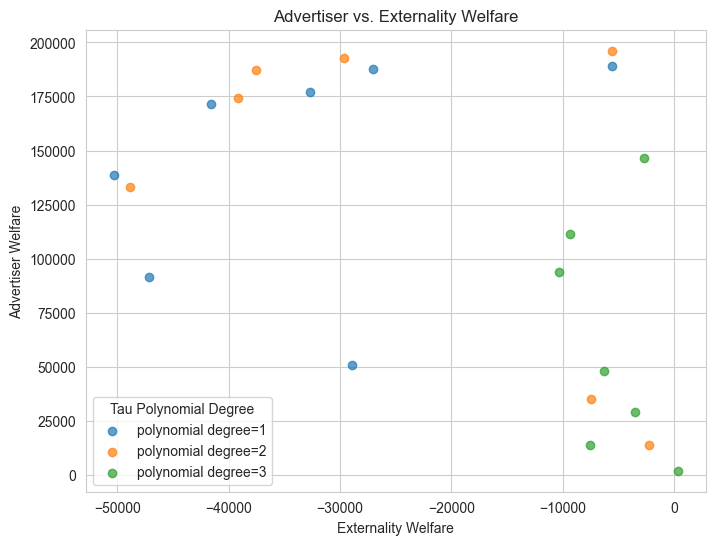

In [12]:
# Plot ad welfare vs ext welfare
df_k_1 = df[df['k'] == 1]

sns.set_style('whitegrid')
# Define a mapping from polynomial_degree to a named colormap
cmap_dict = {
    1: 'Blues',
    2: 'Reds',
    3: 'Greens'
}


plt.figure(figsize=(8,6))
# We will keep track of the min and max of externality_cost_per_impression
# so that each scatter uses the same color scale
vmin = df['externality_cost_per_impression'].min()
vmax = df['externality_cost_per_impression'].max()

for poly in [1, 2, 3]:
    subset = df_k_1[df_k_1['polynomial_degree'] == poly]
    
    # Plot each subset with its own colormap
    scatter = plt.scatter(
        x=subset['w_coll_ext'],
        y=subset['w_coll_adv'],
        # c=subset['externality_cost_per_impression'],
        cmap=cmap_dict[poly],
        alpha=0.7,  # slightly transparent
        # vmin=vmin,  # ensures consistent color scale across subsets
        # vmax=vmax,
        label=f'polynomial degree={poly}'
    )
# A single colorbar for all points
# cbar = plt.colorbar(scatter, label='externality_cost_per_impression')

plt.xlabel('Externality Welfare')
plt.ylabel('Advertiser Welfare')
plt.title('Advertiser vs. Externality Welfare')
plt.legend(title='Tau Polynomial Degree')
# plt.tight_layout()
plt.show()

In [13]:
df['w_adv_change'] = df['w_coll_adv'] - df['w_vcg_adv']
df['w_ext_change'] = df['w_coll_ext'] - df['w_vcg_ext']
df['w_tot_change'] = df['w_coll_tot'] - df['w_vcg_tot']

print(df[['w_adv_change', 'w_ext_change', 'w_tot_change']].describe())

        w_adv_change   w_ext_change   w_tot_change
count      21.000000      21.000000      21.000000
mean   -74358.743231  148866.947623   74508.204392
std     71118.154943  206899.554932  156598.885381
min   -199826.832459      70.937373  -83813.391282
25%   -133243.559269    4224.084476      47.517804
50%    -58843.342429   36291.344572    4401.544956
75%     -6109.993728  285430.777368  134269.021622
max       -23.419569  597243.152257  429190.119329


C:\Users\gabem\AppData\Local\Temp\ipykernel_35336\4001174349.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


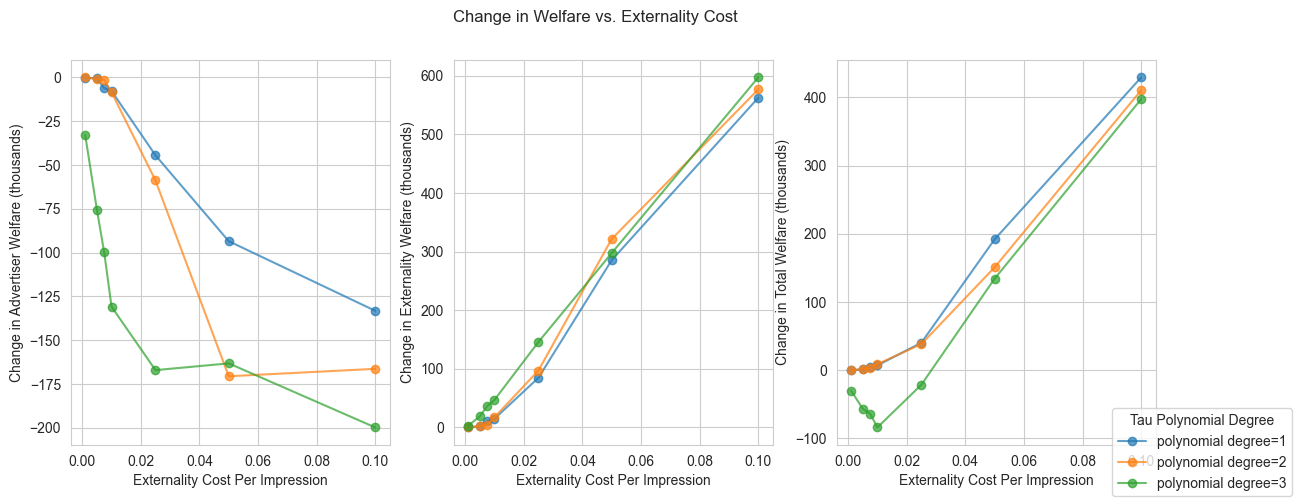

In [31]:
df_k_1['w_adv_change'] = (df_k_1['w_coll_adv'] - df_k_1['w_vcg_adv'])/1000
df_k_1['w_ext_change'] = (df_k_1['w_coll_ext'] - df_k_1['w_vcg_ext'])/1000
df_k_1['w_tot_change'] = (df_k_1['w_coll_tot'] - df_k_1['w_vcg_tot'])/1000

y_labels = ['Change in Advertiser Welfare (thousands)', 'Change in Externality Welfare (thousands)', 'Change in Total Welfare (thousands)']

# three subplots for each change in welfare
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

for i, col in enumerate(['w_adv_change', 'w_ext_change', 'w_tot_change']):
    for poly in [1, 2, 3]:
        subset = df_k_1[df_k_1['polynomial_degree'] == poly]
        # subset.sort_values(by='externality_cost_per_impression', inplace=True)
        
        # Plot each subset with its own colormap
        scatter = axs[i].plot(
            subset['externality_cost_per_impression'],
            subset[col],
            marker='o',
            alpha=0.7,  # slightly transparent
            label=f'polynomial degree={poly}',
        )
    axs[i].set_ylabel(y_labels[i])
    axs[i].set_xlabel('Externality Cost Per Impression')

# set figure title
fig.suptitle('Change in Welfare vs. Externality Cost')

# --- Deduplicate handles & labels across subplots ---
# 1. Collect from each axis
handles, labels = [], []
for ax in axs:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# 2. Remove duplicates by zipping into a dict
by_label = dict(zip(labels, handles))

# 3. Create one legend for the figure, using unique labels
fig.legend(by_label.values(), by_label.keys(), 
           title='Tau Polynomial Degree', 
           loc='lower right')
# fig.tight_layout()
fig.show()

C:\Users\gabem\AppData\Local\Temp\ipykernel_35336\287351071.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


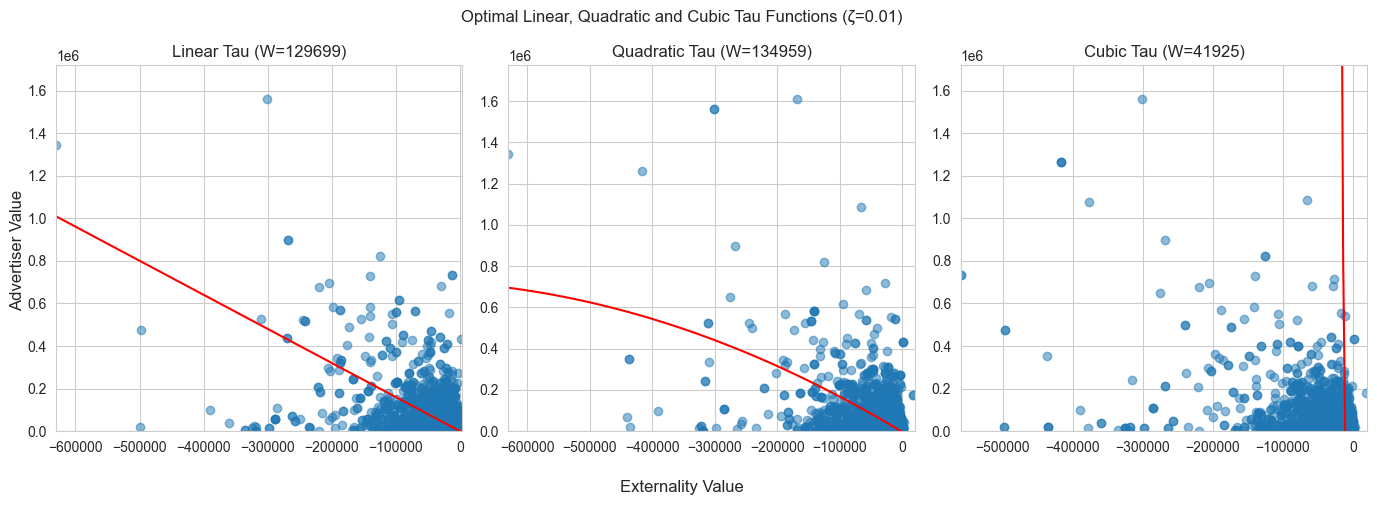

In [53]:
df_for_example_tau = df_k_1[df_k_1['externality_cost_per_impression'] == 0.01]
df_indices = df_for_example_tau.index

# plot advertisers and tau line for each row

titles = ['Linear Tau', 'Quadratic Tau', 'Cubic Tau']
titles = [f'{title} (W={round(df_for_example_tau["w_coll_tot"].iloc[i])})' for i, title in enumerate(titles)]

# three subplots for each change in welfare
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

for i in range(3):
    subset = df_for_example_tau[df_for_example_tau['polynomial_degree'] == i+1]
    advertisers = all_advertisers[df_indices[i]]

    tau_coeffs = subset['tau'].iloc[0]
    
    v = [ad[0] for advertisers_set in advertisers for ad in advertisers_set]
    e = [ad[1] for advertisers_set in advertisers for ad in advertisers_set]
    min_e, max_e = min(e), max(e)*1.1
    division_size = int(((2*max_e) - min_e) / 100)
    tau_x = [min_e + i*division_size for i in range(100)]
    tau_y = [tau(t, tau_coeffs) for t in tau_x]

    axs[i].scatter(e, v, alpha=0.5)
    axs[i].plot(tau_x, tau_y, color='red')
    # axs[i].set_ylabel('Advertiser Value')
    # axs[i].set_xlabel('Externality Value')
    axs[i].set_title(titles[i])

    # set x and y limits
    axs[i].set_xlim(min_e, max_e)
    axs[i].set_ylim(0, max(v)*1.1)
    

# set figure title
fig.suptitle('Optimal Linear, Quadratic and Cubic Tau Functions (ζ=0.01)')
fig.supxlabel('Externality Value')
fig.supylabel('Advertiser Value')
fig.tight_layout()
fig.show()




In [55]:
# load k-sweep data
df, all_advertisers = load_data('ga_results_k.pkl')
print(df.shape)

(9, 13)


In [56]:
print(df['polynomial_degree'])

0    1
1    2
2    3
3    1
4    2
5    3
6    1
7    2
8    3
Name: polynomial_degree, dtype: int64


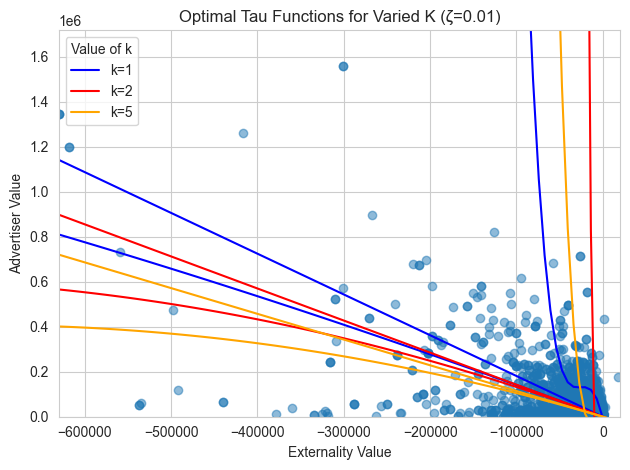

In [66]:

cmap = {1: 'blue', 2: 'red',5: 'orange'}
full_advertisers_set = [ad for advertisers_set in all_advertisers for ad in advertisers_set]

v = [ad[0] for advertisers_set in advertisers for ad in advertisers_set]
e = [ad[1] for advertisers_set in advertisers for ad in advertisers_set]
min_e, max_e = min(e), max(e)*1.1
division_size = int(((2*max_e) - min_e) / 100)
tau_x = [min_e + i*division_size for i in range(100)]

plt.scatter(e, v, alpha=0.5)

for i in range(9):

    tau_coeffs = df['tau'].iloc[i]
    
    tau_y = [tau(t, tau_coeffs) for t in tau_x]

    plt.plot(tau_x, tau_y, color=cmap[df['k'].iloc[i]])

# set x and y limits
plt.xlim(min_e, max_e)
plt.ylim(0, max(v)*1.1)

# Create one custom legend entry per color (k-value)
blue_line  = mlines.Line2D([], [], color='blue',  label='k=1')
red_line   = mlines.Line2D([], [], color='red',   label='k=2')
green_line = mlines.Line2D([], [], color='orange', label='k=5')

plt.legend(handles=[blue_line, red_line, green_line], 
           loc='best', title="Value of k")
    

# set figure title
plt.title('Optimal Tau Functions for Varied K (ζ=0.01)')
plt.xlabel('Externality Value')
plt.ylabel('Advertiser Value')
plt.tight_layout()
plt.show()